# 数据准备

In [164]:
import pandas as pd
pd.set_option('display.max_columns', None) #显示所有的列
pd.set_option('mode.chained_assignment',None) #关闭SettingWithCopyWarning告警，通常情况不要关闭，在这里主要是为了减少页面干扰

# 读取爬取的CSV文件
movies_orig = pd.read_csv("./data/movies.csv")
movies_orig

,MOVIE_ID,NAME,ALIAS,ACTORS,COVER,DIRECTORS,DOUBAN_SCORE,DOUBAN_VOTES,GENRES,IMDB_ID,LANGUAGES,MINS,OFFICIAL_SITE,REGIONS,RELEASE_DATE,SLUG,STORYLINE,TAGS,YEAR,ACTOR_IDS,DIRECTOR_IDS
0,26670818,情定河州,情定临夏天使然,王博/吴佳尼/王姬/高丽雯/郭力行/尹哲/沈丹萍/罗中旭/臧金生/罗刚/居文沛/阎青妤,NaN,尹哲,0.0,0.0,剧情/爱情,NaN,汉语普通话,0.0,NaN,中国大陆,NaN,RmNQQeyzb,电影《情定临夏天使然》讲述临夏新一代青年人发奋图强、借助国家一带一路战略励志创业的故事。,甘肃/临夏/伊斯兰/中国/2016/中国大陆/烂片/宣传伊斯兰教的电影,2049.0,王博:|吴佳尼:1313262|王姬:1275275|高丽雯:1325661|郭力行:135...,尹哲:1326188
1,25815002,我不是李小龙,NaN,谷尚蔚/吴孟达/曾志伟/杜海涛,NaN,洪金宝,0.0,0.0,动作/爱情,NaN,汉语普通话,0.0,NaN,中国大陆,NaN,EZnVfiNYf,桀骜不驯的如龙武功高强，在一场比赛中，被打成重伤，被诊今生不能再用功夫。女友荆兰为激发他重新...,穿越/华语,2049.0,谷尚蔚:1330813|吴孟达:1016771|曾志伟:1002862|杜海涛:1313024,洪金宝:1055887
2,26392287,曼哈顿中国女孩,NaN,NaN,NaN,NaN,0.0,0.0,剧情,NaN,英语 / 汉语普通话,0.0,NaN,中国大陆 / 美国,NaN,NuUvEJnzb,平民女孩李莉只身初入曼哈顿求学，在历经迷失与困惑之后，凭借努力与善良收获了事业上的成功，同时...,NaN,2049.0,NaN,NaN
3,26695995,绿毛水怪,NaN,NaN,NaN,梁栋/吴国墉,0.0,0.0,爱情,NaN,汉语普通话,0.0,NaN,中国大陆,NaN,rqaqyb6ea,王小波经典中篇小说《绿毛水怪》将改编电影。《绿毛水怪》是王小波早期手稿作品，以天马行空的想象...,小波/王小波/爱情/小说改编/文学改编/剧情/中国/2017,2049.0,NaN,梁栋:|吴国墉:
4,26392292,为了祖国,NaN,NaN,NaN,NaN,0.0,0.0,剧情/历史,NaN,汉语普通话 / 韩语 / 日语,0.0,NaN,中国大陆 / 韩国,NaN,Inrqy7uib,1932年上海虹口爆炸案后，韩国国父金九在褚辅成、朱爱宝这些普通群众的帮助下逃到嘉兴避难。金...,NaN,2049.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140497,5108106,Pretty Boy and Rosa - 电影,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,nN2zjz7Yf,NaN,NaN,0.0,NaN,NaN
140498,5108082,番茄杀手 - 电影,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,N2jjNYnVf,NaN,NaN,0.0,NaN,NaN
140499,5108078,Fast Track - 电影,NaN,基思·卡拉丹/弗雷德·威廉森/邓肯·雷格尔/布兰迪·莱德福特/塞巴斯蒂安·斯宾赛/罗伯特·卡...,NaN,T·J·斯科特,0.0,0.0,剧情/动作,tt0124239,英语,60.0,NaN,美国,NaN,AIBeyzzVf,NaN,NaN,1997.0,NaN,NaN
140500,5108060,7-9-13 - 电影,NaN,NaN,NaN,NaN,0.0,0.0,喜剧,tt0124270,丹麦语,0.0,NaN,丹麦,NaN,EJ3zzbERe,NaN,NaN,1934.0,NaN,NaN


# 数据清洗

在爬取的数据上有一些不合理的数据和无效的数据，需要对其进行清洗得到合法的数据。
例如对年份数据，下面还有一些未来的年份，基本上为不合法的数据，可以在数据当中进行清除。

## 不合理数据清理

In [165]:
movies_orig['YEAR'].unique()

array([2049., 2046., 2045., 2035., 2033., 2030., 2028., 2027., 2026.,
       2025., 2024., 2023., 2022., 2021., 2020., 2019., 2018., 2017.,
       2016., 2015., 2014., 2013., 2012., 2011., 2010., 2009., 2008.,
       2007., 2006., 2005., 2004., 2003., 2002., 2001., 2000., 1999.,
       1998., 1997., 1996., 1995., 1994., 1993., 1992., 1991., 1990.,
       1989., 1988., 1987., 1986., 1985., 1984., 1983., 1982., 1981.,
       1980., 1979., 1978., 1977., 1976., 1975., 1974., 1973., 1972.,
       1971., 1970., 1969., 1968., 1967., 1966., 1965., 1964., 1963.,
       1962., 1961., 1960., 1959., 1958., 1957., 1956., 1955., 1954.,
       1953., 1952., 1951., 1950., 1949., 1948., 1947., 1946., 1945.,
       1944., 1943., 1942., 1941., 1940., 1939., 1938., 1937., 1936.,
       1935., 1934., 1933., 1932., 1931., 1930., 1929., 1928., 1927.,
       1926., 1925., 1924., 1923., 1922., 1921., 1920., 1919., 1918.,
       1917., 1916., 1915., 1914., 1913., 1912., 1911., 1910., 1909.,
       1908., 1907.,

豆瓣评分为0的数据多为无效数据，直接忽略

In [166]:
movies_orig['DOUBAN_SCORE'].unique()

array([0. , 5.5, 7.3, 7.1, 6.9, 6.6, 5.4, 7.7, 6.1, 5. , 5.8, 6.7, 3.3,
       8.5, 6. , 6.5, 4.6, 2.8, 7.9, 4.8, 7.6, 6.4, 4.7, 8.1, 5.9, 8.6,
       8.9, 5.6, 4.2, 6.8, 7.4, 3.8, 5.2, 8. , 5.3, 4.4, 4. , 3.9, 4.5,
       5.7, 6.3, 6.2, 4.3, 3.6, 4.9, 7.5, 7.2, 4.1, 8.3, 8.2, 3.1, 7.8,
       2.5, 8.8, 3.4, 5.1, 3.5, 2.9, 3.2, 3.7, 9.4, 7. , 3. , 8.4, 2.3,
       2.2, 2.6, 2.7, 9.2, 9.1, 8.7, 9.3, 9. , 2.4, 9.6, 2. , 2.1, 9.5,
       9.7, 9.8])

In [167]:
# 数据清洗
movies = movies_orig[
    (movies_orig['YEAR'] <=2021) & 
    (movies_orig['YEAR'] > 0) & 
    (movies_orig['DOUBAN_SCORE'] != 0) & 
    (movies_orig['DOUBAN_VOTES'] != 0) & 
    (movies_orig['MINS'] !=0) &
    (pd.notnull(movies_orig['GENRES'])) & 
    (pd.notnull(movies_orig['RELEASE_DATE']))
]

movies.head()

,MOVIE_ID,NAME,ALIAS,ACTORS,COVER,DIRECTORS,DOUBAN_SCORE,DOUBAN_VOTES,GENRES,IMDB_ID,LANGUAGES,MINS,OFFICIAL_SITE,REGIONS,RELEASE_DATE,SLUG,STORYLINE,TAGS,YEAR,ACTOR_IDS,DIRECTOR_IDS
1378,30376977,小Q,NaN,任达华/梁咏琪/罗仲谦/杨采妮/袁姗姗/袁澧林/刘楚恬/林文龙/郭晋安/胡明/余佳哝/陈雅丽...,NaN,罗永昌,7.3,6497.0,剧情,tt10584272,汉语普通话 / 粤语,107.0,NaN,中国大陆 / 中国香港,2019-08-15,YfU3b6eqa,本片讲述了聪明可爱的小Q在训练师悉心照料和训练过程中成长为一只合格的导盲犬，并遇到了主人李宝...,治愈/温情/宠物/感动/动物/暖暖的可爱的/香港/剧情,2019.0,任达华:1031194|梁咏琪:1000975|罗仲谦:1313369|杨采妮:101837...,罗永昌:1274489
1384,27109171,娑婆诃,沙婆诃,李政宰/朴正民/李在仁/陈善圭,NaN,张宰贤,7.1,15531.0,剧情/悬疑/惊悚,tt7299298,韩语,122.0,NaN,韩国,2019-02-20,NI3NQe6mb,本片讲述追逐新兴宗教集团的“朴牧师”(李政宰饰)面对疑问人物和事件，揭露其舞弊和弊端的故事。,韩国/宗教/悬疑/惊悚/恐怖/邪教/2019/犯罪,2019.0,李政宰:1109907|朴正民:1335493|李在仁:1394288|陈善圭:1382194,张宰贤:1353718
1386,30365915,西比勒,NaN,维尔日妮·埃菲拉/阿黛尔·艾克萨勒霍布洛斯/加斯帕德·尤利尔/劳尔·卡拉米/保罗·艾米/桑德...,NaN,茹斯汀·特里叶,6.9,114.0,剧情/喜剧,tt9173264,法语 / 英语,100.0,NaN,法国 / 比利时,2019-05-24,vibUvMYZf,维尔日妮·埃菲拉([她])、阿黛尔·艾克萨勒霍布洛斯、加斯帕德·尤利尔、尼尔斯·施内德([我...,法国/2019/戛纳/法国电影/剧情/加斯帕德·尤利尔/欧洲/戛纳电影节,2019.0,维尔日妮·埃菲拉:1187894|阿黛尔·艾克萨勒霍布洛斯:1328876|加斯帕德·尤利尔...,茹斯汀·特里叶:1331571
1403,30210700,巨鳄风暴,噬逃险鳄(港) / 鳄魔(台) / 爬行,卡雅·斯考达里奥/巴里·佩珀/罗斯·安德森/安森·布恩/乔治·索纳/阿米‧梅特卡夫/何塞‧帕...,NaN,亚历山大·阿嘉,6.6,773.0,剧情/惊悚/灾难,tt8364368,英语,87.0,NaN,美国,2019-07-12,R27A2FR2b,一场猛烈的飓风正在逼近美国佛罗里达州的一座小镇。女主角海莉（卡雅·斯考达里奥饰）在游泳训练中...,灾难/惊悚/恐怖/美国/2019/鳄鱼/怪兽/血腥,2019.0,卡雅·斯考达里奥:1031178|巴里·佩珀:1000075|罗斯·安德森:1343976|...,亚历山大·阿嘉:1022791
1429,30211551,恶人传,极恶对决(台) / 恶霸‧魔警‧杀人狂(港),马东锡/金武烈/金成圭/刘承睦/崔民哲/金胤成/许栋元/吴熙俊/杨志洙/金桀/李恩泉/刘在明,NaN,李元泰,7.7,110445.0,剧情/动作/犯罪,tt10208198,韩语,109.0,NaN,韩国,2019-05-15,u62FBIRYf,罪犯头目张东洙（Don Lee）被一名神秘莫测的连环杀手暴力袭击之后幸存，与当地警探郑泰硕（...,韩国/犯罪/暴力/动作/警匪/人性/悬疑/2019,2019.0,马东锡:1322205|金武烈:1321041|金成圭:1382228|刘承睦:133178...,李元泰:1380589


## 数据格式转换

日期转换

RELEASE_DATE栏原始格式为object，实际应该为datetime格式，方便进行分析

In [168]:
movies_orig["RELEASE_DATE"]

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
             ...    
140497           NaN
140498           NaN
140499           NaN
140500           NaN
140501    2003-12-04
Name: RELEASE_DATE, Length: 140502, dtype: object

In [171]:
movies['RELEASE_DATE'] = pd.to_datetime(movies['RELEASE_DATE'])
movies['RELEASE_DATE']

1378    2019-08-15
1384    2019-02-20
1386    2019-05-24
1403    2019-07-12
1429    2019-05-15
           ...    
91320   1913-09-29
91334   1913-11-26
91335   1913-08-22
91360   1911-03-10
97512   2003-06-05
Name: RELEASE_DATE, Length: 21029, dtype: datetime64[ns]

数值类型转换
year应为整数

In [172]:
movies['YEAR']=movies['YEAR'].astype(int)
movies['YEAR']

1378     2019
1384     2019
1386     2019
1403     2019
1429     2019
         ... 
91320    1913
91334    1913
91335    1913
91360    1911
97512    2003
Name: YEAR, Length: 21029, dtype: int64

# 基础数据分析

通过describe函数能够快速的计算出一个列的统计属性

In [9]:
movies[['MINS','DOUBAN_SCORE','DOUBAN_VOTES']].describe()

,MINS,DOUBAN_SCORE,DOUBAN_VOTES
count,21029.000000,21029.000000,2.102900e+04
mean,100.101859,6.643830,9.631830e+03
std,43.333054,1.277283,4.281167e+04
min,1.000000,2.000000,2.300000e+01
25%,90.000000,6.000000,1.460000e+02
50%,98.000000,6.800000,5.330000e+02
75%,110.000000,7.500000,2.635000e+03
max,5220.000000,9.800000,1.261985e+06


## 找到评论数量TOP5的电影

In [173]:
movies.sort_values('DOUBAN_VOTES', ascending=False).head(5)

,MOVIE_ID,NAME,ALIAS,ACTORS,COVER,DIRECTORS,DOUBAN_SCORE,DOUBAN_VOTES,GENRES,IMDB_ID,LANGUAGES,MINS,OFFICIAL_SITE,REGIONS,RELEASE_DATE,SLUG,STORYLINE,TAGS,YEAR,ACTOR_IDS,DIRECTOR_IDS
46731,1291561,千与千寻,神隐少女(台) / 千与千寻的神隐,柊瑠美/入野自由/夏木真理/菅原文太/中村彰男/玉井夕海/神木隆之介/内藤刚志/泽口靖子/我...,NaN,宫崎骏,9.3,1261985.0,剧情/动画/奇幻,tt0245429,日语,125.0,http://toho.co.jp/sentochihiro/index2.html,日本,2019-06-21,bMQYvaMAe,千寻和爸爸妈妈一同驱车前往新家，在郊外的小路上不慎进入了神秘的隧道——他们去到了另外一个诡异...,日本/动画/动漫/成长/经典/温情/人性/吉卜力,2001,柊瑠美:1023337|入野自由:1005438|夏木真理:1045797|菅原文太:102...,宫崎骏:1054439
56283,1291546,霸王别姬,再见，我的妾,张国荣/张丰毅/巩俐/葛优/英达/蒋雯丽/吴大维/吕齐/雷汉/尹治/马明威/费振翔/智一桐/...,https://img3.doubanio.com/view/photo/s_ratio_p...,陈凯歌,9.6,1167141.0,剧情/爱情/同性,tt0106332,汉语普通话,171.0,NaN,中国大陆 / 中国香港,1993-01-01,YZ3jra6ua,段小楼（张丰毅）与程蝶衣（张国荣）是一对打小一起长大的师兄弟，两人一个演生，一个饰旦，一向配...,经典/人性/文艺/爱情/人生/同志/剧情/文革,1993,张国荣:1003494|张丰毅:1050265|巩俐:1035641|葛优:1000905|...,陈凯歌:1023040
39442,1849031,当幸福来敲门,寻找快乐的故事(港) / 追求快乐 / 幸福追击,威尔·史密斯/贾登·史密斯/坦迪·牛顿/布莱恩·豪威 /詹姆斯·凯伦/丹·卡斯泰兰尼塔/柯特...,NaN,加布里埃莱·穆奇诺,9.1,889529.0,剧情/家庭/传记,tt0454921,英语 / 粤语,117.0,NaN,美国,2008-01-17,7QYZ3F3ba,克里斯•加纳（威尔·史密斯 Will Smith 饰）用尽全部积蓄买下了高科技治疗仪，到处向...,励志/父子/感动/人生/经典/家庭/美国电影/剧情,2006,威尔·史密斯:1027138|贾登·史密斯:1010532|坦迪·牛顿:1040513|布莱...,加布里埃莱·穆奇诺:1045093
3498,26794435,哪吒之魔童降世,哪吒降世,吕艳婷/囧森瑟夫/瀚墨/陈浩/绿绮/张珈铭/杨卫,NaN,饺子,8.6,889431.0,剧情/喜剧/动画/奇幻,tt10627720,汉语普通话,110.0,NaN,中国大陆,2019-07-26,VfyrUJvyb,天地灵气孕育出一颗能量巨大的混元珠，元始天尊将混元珠提炼成灵珠和魔丸，灵珠投胎为人，助周伐纣...,哪吒/动画/中国大陆/神话/成长/2019/亲情/搞笑,2019,吕艳婷:1419996|囧森瑟夫:1400125|瀚墨:1400124|陈浩:1329520...,饺子:1328441
12661,26387939,摔跤吧！爸爸,我和我的冠军女儿(台) / 打死不离3父女(港) / 摔跤吧！老爸 / 摔跤家族,阿米尔·汗/法缇玛·萨那·纱卡/桑亚·玛荷塔/阿帕尔夏克提·库拉那/沙克希·坦沃/塞伊拉·沃...,NaN,涅提·蒂瓦里,9.0,870905.0,剧情/家庭/传记/运动,tt5074352,印地语,161.0,NaN,印度,2017-05-05,YfaMI3jjb,马哈维亚（阿米尔·汗 Aamir Khan 饰）曾经是一名前途无量的摔跤运动员，在放弃了职业...,励志/印度/成长/亲情/女权/女性/体育/运动,2016,阿米尔·汗:1031931|法缇玛·萨那·纱卡:1372457|桑亚·玛荷塔:1372458...,涅提·蒂瓦里:1366907


### 小练习：找到时间最长和最短的电影

In [175]:
movies[movies['MINS']== 1]

,MOVIE_ID,NAME,ALIAS,ACTORS,COVER,DIRECTORS,DOUBAN_SCORE,DOUBAN_VOTES,GENRES,IMDB_ID,LANGUAGES,MINS,OFFICIAL_SITE,REGIONS,RELEASE_DATE,SLUG,STORYLINE,TAGS,YEAR,ACTOR_IDS,DIRECTOR_IDS
20285,26176832,盖被子,帮我盖被子,NaN,NaN,NaN,7.0,1050.0,恐怖/儿童,tt3776384,英语,1.0,NaN,西班牙,2014-06-03,FnjFnrMYf,夜幕降临，一户普通的三口之家。小男孩亚历克斯（Luka Schardan 饰）早早上床准备睡...,短片/西班牙/恐怖/惊悚/2014/悬疑/儿童/真人短片,2014,NaN,NaN


In [174]:
# movies[movies['MINS']== 请填写数值]

# 可视化

## 使用matplotlib

matplotlib功能非常强大和完备，可以输出专业的图标
pandas支持matplotlib直接输出图形，但默认的图形无法动态交互

<AxesSubplot:>

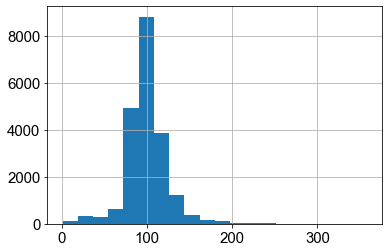

In [25]:
%matplotlib inline

pd.options.plotting.backend = 'matplotlib' #默认就是matplotlib，主要是后续需要设置其他的backend，再执行一次清除之前的设定
movies[movies['MINS']<360]['MINS'].hist(bins=20)

## 使用plotly

In [44]:
import plotly.io as pio
pio.renderers.default='iframe'  # plotly和jupyterlab有一些问题,需要特别设置为iframe
pd.options.plotting.backend = "plotly" #切换成plotly的backend，生成交互图

movies[movies['MINS']<360]['MINS'].hist(nbins=20)

绘制饼图

In [45]:
import plotly.graph_objects as go
labels = ['超短(0-60min)','短(60-90min)','中(90-120min)','长(120-150min)','特长(150-360min)']
values = pd.cut(movies['MINS'].values,bins = [0,60,90,120,150,360], labels=labels).value_counts()
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

更丰富的图形样式: https://plotly.com/python/pie-charts/

In [46]:
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig.update_traces(hoverinfo='label+percent', textinfo='label+value+percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

# 抽取更多特征

有时候我们需要生成一些特征供分析使用，以下将RELEASE_DATE中提取出年份、月份信息，用于后续分析

In [176]:
movies['RELEASE_YEAR'] = movies['RELEASE_DATE'].dt.year
movies['RELEASE_MONTH'] = movies['RELEASE_DATE'].dt.month

In [177]:
douban_scores = movies[movies['RELEASE_YEAR']>1990][['RELEASE_YEAR','DOUBAN_SCORE']].groupby(['RELEASE_YEAR']).agg(['count','mean']).reset_index()
douban_scores

RELEASE_YEAR DOUBAN_SCORE          
                       count      mean
0          1991          219  7.131507
1          1992          228  7.039474
2          1993          238  7.116387
3          1994          238  7.167647
4          1995          268  7.215299
5          1996          242  7.075207
6          1997          280  7.185000
7          1998          297  7.182828
8          1999          314  7.176115
9          2000          367  7.073025
10         2001          377  6.995491
11         2002          445  7.016854
12         2003          415  6.934217
13         2004          518  6.848649
14         2005          552  6.792391
15         2006          683  6.728990
16         2007          729  6.669959
17         2008          743  6.563257
18         2009          732  6.603142
19         2010          691  6.616064
20         2011          769  6.393888
21         2012          869  6.281473
22         2013          912  6.204386
23         2014          956  6.016527
24         2015         1043  6.025695
25         2016         1092  5.807234
26         2017          919  5.769859
27         2018          807  5.989219
28         2019          319  6.106270

Matplotlib基础设置

In [179]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

pd.options.plotting.backend = 'matplotlib'

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # mac下中文解决方案
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)

Matplotlib相对高级的用法，两个图共享一个x轴并且显示两种不同的图形

In [180]:
# 创建子图，大小15*10
fig, ax1 = plt.subplots(figsize=(10,7))

# 绘制蓝色的图形和设置xy轴的数据
color = 'tab:blue'
ax1.set_xlabel('年份',  size=15)
ax1.set_ylabel('电影数量', color=color,  size=15)
ax1.bar(douban_scores['RELEASE_YEAR'], douban_scores['DOUBAN_SCORE']['count'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # ax2和ax1共享一个轴
ax1.set_xticklabels(ax1.get_xticks(), rotation = 45)

# 绘制红色的图形和设置xy轴的数据
color = 'tab:red'
ax2.set_ylabel('豆瓣电影评分', color=color, size=15)  # we already handled the x-label with ax1
ax2.plot(douban_scores['RELEASE_YEAR'], douban_scores['DOUBAN_SCORE']['mean'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(5,8) # 设置y的最大值

fig.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<ipython-input-180-e0c658f94862>:12: UserWarning:

FixedFormatter should only be used together with FixedLocator



将年份和月份数据分离，使用热力图展示每个月分钟上映的电影
seaborn库提供了大量的好用的函数，可以方便的生成高质量的图形

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

data = movies.groupby([movies['RELEASE_DATE'].dt.year, movies['RELEASE_DATE'].dt.month]).count()['NAME'].unstack()
# 列重命名
data.columns = data.columns.rename("month")
data.index = data.index.rename("year")
data

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1911,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN
1914,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1915,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
1916,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2015,79.0,83.0,67.0,83.0,113.0,80.0,50.0,88.0,137.0,105.0,87.0,71.0
2016,104.0,81.0,83.0,96.0,110.0,74.0,69.0,94.0,155.0,84.0,69.0,73.0
2017,85.0,74.0,77.0,81.0,98.0,76.0,52.0,58.0,113.0,86.0,64.0,55.0


In [183]:
f, ax = plt.subplots(figsize=(6, 10))
sns.heatmap(data, annot=False, linewidths=.05, ax=ax, cmap="YlGnBu")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='month', ylabel='year'>

## 绘制和地图相关的数据

In [152]:
top10 = movies[['REGIONS', 'DOUBAN_SCORE']].groupby("REGIONS").count().sort_values(by='DOUBAN_SCORE', ascending=False)[0:11].reset_index()
top10

,REGIONS,DOUBAN_SCORE
0,美国,5415
1,日本,2997
2,中国大陆,1728
3,中国香港,1487
4,韩国,1054
5,法国,986
6,英国,963
7,德国,385
8,中国台湾,300
9,意大利,268


由于地图数据中用的是英文，所以这里需要进行一个映射。为了简化，这里直接对一个列其进行赋值

In [224]:
top10['county'] = ['United States of America','Japan','China','China', 'South Korea', 'France', 'United Kingdom', 'Germany', 'Taiwan', 'Italy','India']
top10_geo = top10.groupby('county').sum().reset_index()
top10_geo

,county,DOUBAN_SCORE
0,China,3215
1,France,986
2,Germany,385
3,India,261
4,Italy,268
5,Japan,2997
6,South Korea,1054
7,Taiwan,300
8,United Kingdom,963
9,United States of America,5415


In [229]:
import geopandas

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot(figsize=[15,10])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:>

In [228]:
world_with_douban = world.merge(top10_geo, how='outer' ,left_on='name',right_on='county')
world_with_douban.plot(column='DOUBAN_SCORE', figsize=[15,10], legend=True, cmap='Reds',edgecolor="gray", missing_kwds={"color": "#EFEFEF"})

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:>